<a href="https://colab.research.google.com/github/askazera/Job-Market-DataAnalisys/blob/main/ProjetoIPEA_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto - Mercado de Trabalho**

Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

Professor(a): Franciane Rodrigues

Analistas:

* Anderson Melo

* Aska Pereira

* Diego Aguiar

* Jéssica Staudt

* Pedro Barrionovo

* Rosana Santos

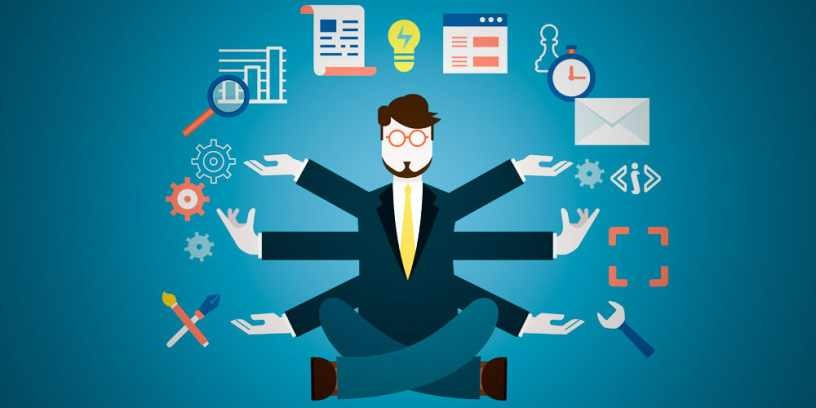

### **Sobre os Dados**

 O Instituto de Pesquisa Econômica Aplicada (Ipea) lançou um estudo com indicadores inéditos no Brasil sobre mercado de trabalho e produtividade. Um deles é o Índice de Qualidade do Trabalho (IQT), que analisa dados de  experiência da população ocupada do país.

O conjunto de dados a ser utilizado é proveniente de um estudo que analisa os aspectos determinantes do Mercado de Trabalho no Brasil. O mercado de trabalho brasileiro passou por grandes desafios nos últimos anos, mas também apresenta oportunidades e tendências para o futuro. Alguns fatores que influenciam o mercado de trabalho são: a situação econômica, a qualificação profissional, a demanda por novas habilidades, a diversidade e a inclusão, a tecnologia e a inovação.

Nos links a seguir é possível encontrar esses estudos e irá auxiliar na análise de dados do projeto.

Fonte:

1. https://www.ipea.gov.br/cartadeconjuntura/index.php/category/mercado-de-trabalho
   


## Análise de Dados:

1. O quê? Distribuições de trabalho formal e informal, entre outros.

2. Por quê? Entender e identificar baseado nas escolhas da população a preferência de sua escolha.

3. Quem? Identificar quem são as pessoas ou grupos envolvidos no objetivo.

4. Quando? Verificar as motivações associadas ao mercado de trabalho.

5. Onde? No mercado de trabalho.

#Dicionário

##Dicionário IPEA
<table widths="30;60" cellpadding="1.5" border="1">
        <tr>
            <td bgcolor="#2F4F4F">
<p><b>Ano_Mes</b>: Ano e mês do trimestre móvel<p/>
<b>Populacao</b>: População total<p/>
<b>Ocupacao</b>: Pessoas de 14 anos ou mais de idade, ocupadas (no mercado de trabalho) na semana de referência<p/>
<b>Desocupacao</b>: Pessoas de 14 anos ou mais de idade, desocupadas na semana de referência<p/>
<b>Fora_da_forca</b>: Pessoas de 14 anos ou mais de idade, fora da força de trabalho na semana de referência<p/>
<b>Privado_com_cart</b>: Empregado no setor privado com carteira de trabalho assinada<p/>
<b>Privado_sem_cart</b>: Empregado no setor privado sem carteira de trabalho assinada<p/>
<b>Domestico_com_cart</b>:Trabalhador doméstico com carteira de trabalho assinada<p/>
<b>Domestico_sem_cart</b>: Trabalhador doméstico sem carteira de trabalho assinada<p/>
<b>Publi_com_cart</b>: Empregado no setor público com carteira de trabalho assinada<p/>
<b>Publi_sem_cart</b>: Empregado no setor público sem carteira de trabalho assinada<p/>
<b>Conta_prop_com_cnpj</b>: Conta-própria com registro no Cadastro Nacional da Pessoa Jurídica (CNPJ)<p/>
<b>Conta_prop_sem_cnpj</b>: Conta-própria sem registro no Cadastro Nacional da Pessoa Jurídica (CNPJ)<p/>
<b>Trabalhador_familiar</b>: Trabalhador familiar auxiliar
                </p>
            </td>
        </tr>
</table>

# Instalações e Importações

As linhas de código **"!pip install gcsfs"** é utilizadas para instalar pacotes adicionais em um projeto. O comando "**!pip install gcsfs"** instala a biblioteca "gcsfs", que possibilita o acesso a sistemas de arquivos distribuídos, como o Google Cloud Storage, facilitando a leitura e gravação de arquivos na nuvem.

#Preparando o ambiente

Configurando o ambiente de desenvolvimento e preparando a infraestrutura necessária para trabalhar com a biblioteca PySpark, que é a interface Python para o Apache Spark.


In [ ]:
# Instalando a biblioteca gcsfs
# Biblioteca usada para interagir com o Google Cloud Storage a partir de código Python.
!pip install gcsfs

In [ ]:
# Instalando o OpenJDK 8 de forma silenciosa
# O OpenJDK é necessário para executar o Apache Spark, que é implementado em Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Baixando o arquivo do Apache Spark na versão 3.1.1 compatível com Hadoop 3.2
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz

# Descompactando o arquivo do Apache Spark
!tar xf spark-3.1.1-bin-hadoop3.2.tgz

# Instalando a biblioteca findspark de forma silenciosa
# A biblioteca "findspark" é útil para localizar a instalação do Spark no ambiente Python
!pip install -q findspark

In [ ]:
# Importando o módulo 'os' para manipulação do ambiente
import os

# Definindo a variável de ambiente 'JAVA_HOME' para o diretório do Java 8
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Definindo a variável de ambiente 'SPARK_HOME' para o diretório do Spark
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [ ]:
# Importando a biblioteca findspark para localizar a instalação do Spark
import findspark

# Inicializando a configuração do Spark usando o findspark
findspark.init()

# Importando a classe SparkSession para criar uma sessão Spark
from pyspark.sql import SparkSession

# Criando uma sessão Spark local usando todos os núcleos disponíveis
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Importando a função 'regexp_replace' do Spark para manipulação de strings
from pyspark.sql.functions import regexp_replace

# Configurando o Spark para avaliação imediata das consultas (eager evaluation)
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Para deixar a visualição das tabelas mais amigável

# Mostrando a sessão Spark configurada
spark

## **Declarando as Bibliotecas**

Algumas bibliotecas são importadas para facilitar a análise de dados. A linha "import pandas as pd" importa a biblioteca Pandas, que fornece estruturas de dados flexíveis e eficientes para manipulação e análise de dados. A linha "import numpy as np" importa a biblioteca NumPy, que é amplamente utilizada para realizar operações numéricas e matemáticas em arrays multidimensionais. A linha "import os" importa a biblioteca os, que fornece funcionalidades relacionadas ao sistema operacional, como manipulação de caminhos de arquivos. A linha "from google.cloud import storage" importa a biblioteca de armazenamento do Google Cloud, permitindo acesso a serviços de armazenamento em nuvem. Por fim, a linha "import seaborn as sn" importa a biblioteca Seaborn, que é uma biblioteca de visualização de dados baseada no Matplotlib, fornecendo recursos adicionais para a criação de gráficos estatísticos e informativos. Essas bibliotecas serão utilizadas ao longo do projeto para manipular, validar, visualizar e analisar os dados.

In [ ]:
# Importando bibliotecas
'''
os: sistema operacional
pandas: para análise de dados
numpy: para cálculos numéricos
google.cloud.storage: para interação com o Google Cloud Storage
matplotlib.pyplot: para visualização de gráficos
seaborn: para visualização estatística de dados

'''
import os
import pandas as pd
import numpy as np
from google.cloud import storage
import matplotlib.pyplot as plt
import seaborn as sn

# Extração

O próximo passo é fazer a extração dos dados. Essa etapa vai depender de onde estarão localizados os dados. Neste projeto em específico serão mostradas como obter os dados localizados em um Google Drive, mas também pelo serviço de armazenamento da GCP (Google Cloud Plataform).


###**Google Cloud**

In [ ]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/symphone-project-2b6e69a15a32.json' # Chave criada no IAM
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('mercado-de-trabalho-projeto')
bucket.blob('ipea.xls')
path = 'gs://mercado-de-trabalho-projeto/Base de Dados/IPEA/Bruto/ipea.xls'

In [ ]:
# Abertura da base de dados e cópia de segurança (bucket)
# Ler o arquivo XLS, utilizando pandas
path = "gs://mercado-de-trabalho-projeto/Base de Dados/IPEA/Bruto/ipea.xls"  # Substitua pelo caminho real do arquivo XLS
df = pd.read_excel(path, sheet_name='TrimestreMovel')

# **Pré-Análise**

A pré-análise é a primeira etapa do processo ETL (Extract, Transform, Load). Ela é responsável por avaliar os dados brutos, identificar possíveis problemas e corrigi-los antes da transformação. A pré-análise pode incluir as seguintes tarefas:

* Verificar a integridade dos dados: verificar se os dados estão completos, consistentes e sem erros.
* Normalizar os dados: converter os dados para um formato padrão, facilitando a sua transformação e análise.
* Descontaminação dos dados: remover os dados inválidos ou irrelevantes.
* Agrupar os dados: agrupar os dados semelhantes para facilitar a sua análise.
* Resolver os conflitos de dados: identificar e resolver os conflitos de dados, como valores duplicados ou inconsistentes.


In [ ]:
# Visualização do DF
df

,anomesfinaltrimmovel,taxapartic,nivelocup,niveldesocup,taxadesocup,perccontribprev,taxacombdesosub,taxacombdesopot,taxacompsubutlz,taxasubocuphoras,...,rhrpagropecuaria,rhrpindustria,rhrpconstrucao,rhrpcomercio,rhrptransporte,rhrpalojaliment,rhrpinfcomfinimobadm,rhrpadminpublica,rhrpoutroservico,rhrpservicodomestico
0,201203,62.299999,57.299999,5.0,8.0,62.000000,15.3,14.0,20.9,8.0,...,1474,2789,2229,2396,2913,2046,3889,3889,2221,1046
1,201204,62.700001,57.799999,4.9,7.8,61.900002,14.8,13.3,19.9,7.5,...,1494,2816,2216,2403,2965,2039,3901,3863,2258,1040
2,201205,62.900002,58.000000,4.8,7.7,61.799999,14.4,12.9,19.3,7.3,...,1498,2785,2268,2380,2966,2024,3945,3822,2255,1044
3,201206,62.900002,58.099998,4.8,7.6,61.900002,14.1,12.7,18.9,7.1,...,1507,2783,2291,2376,2957,2052,3944,3848,2217,1041
4,201207,62.900002,58.200001,4.7,7.5,62.099998,13.7,12.5,18.4,6.7,...,1500,2777,2334,2397,2914,2043,3986,3878,2201,1037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,202301,61.900002,56.700001,5.2,8.4,64.599998,13.2,14.2,18.7,5.3,...,1874,2792,2321,2362,2735,1928,4192,4094,2273,1116
131,202302,61.700001,56.400002,5.3,8.6,64.599998,13.3,14.4,18.8,5.2,...,1872,2778,2287,2387,2747,1935,4145,4099,2325,1126
132,202303,61.599998,56.099998,5.4,8.8,64.599998,13.5,14.5,18.9,5.1,...,1866,2776,2278,2414,2704,1972,4196,4069,2294,1131
133,202304,61.400002,56.200001,5.2,8.5,64.800003,13.2,14.0,18.4,5.2,...,1846,2781,2285,2386,2725,1955,4143,4064,2245,1134


In [ ]:
# Função head(): exibe as primeiras linhas do DataFrame

df.head()

,anomesfinaltrimmovel,taxapartic,nivelocup,niveldesocup,taxadesocup,perccontribprev,taxacombdesosub,taxacombdesopot,taxacompsubutlz,taxasubocuphoras,...,rhrpagropecuaria,rhrpindustria,rhrpconstrucao,rhrpcomercio,rhrptransporte,rhrpalojaliment,rhrpinfcomfinimobadm,rhrpadminpublica,rhrpoutroservico,rhrpservicodomestico
0,201203,62.299999,57.299999,5.0,8.0,62.000000,15.3,14.0,20.9,8.0,...,1474,2789,2229,2396,2913,2046,3889,3889,2221,1046
1,201204,62.700001,57.799999,4.9,7.8,61.900002,14.8,13.3,19.9,7.5,...,1494,2816,2216,2403,2965,2039,3901,3863,2258,1040
2,201205,62.900002,58.000000,4.8,7.7,61.799999,14.4,12.9,19.3,7.3,...,1498,2785,2268,2380,2966,2024,3945,3822,2255,1044
3,201206,62.900002,58.099998,4.8,7.6,61.900002,14.1,12.7,18.9,7.1,...,1507,2783,2291,2376,2957,2052,3944,3848,2217,1041
4,201207,62.900002,58.200001,4.7,7.5,62.099998,13.7,12.5,18.4,6.7,...,1500,2777,2334,2397,2914,2043,3986,3878,2201,1037


In [ ]:
# Visualização do df de forma aleatória

df.sample(5)

,anomesfinaltrimmovel,taxapartic,nivelocup,niveldesocup,taxadesocup,perccontribprev,taxacombdesosub,taxacombdesopot,taxacompsubutlz,taxasubocuphoras,...,rhrpagropecuaria,rhrpindustria,rhrpconstrucao,rhrpcomercio,rhrptransporte,rhrpalojaliment,rhrpinfcomfinimobadm,rhrpadminpublica,rhrpoutroservico,rhrpservicodomestico
30,201409,62.299999,58.099998,4.3,6.9,65.000000,11.3,10.5,14.8,4.8,...,1619,2959,2348,2429,3036,2143,4135,4047,2339,1150
108,202103,59.799999,50.900002,8.9,14.9,64.699997,21.8,23.4,29.6,8.1,...,1720,2886,2072,2307,2577,1905,4082,4547,2145,1080
4,201207,62.900002,58.200001,4.7,7.5,62.099998,13.7,12.5,18.4,6.7,...,1500,2777,2334,2397,2914,2043,3986,3878,2201,1037
33,201412,62.299999,58.200001,4.1,6.6,65.000000,11.3,10.4,14.9,5.1,...,1632,2833,2374,2459,3096,2110,4164,4052,2316,1152
15,201306,62.799999,58.099998,4.7,7.5,63.099998,12.8,11.9,16.8,5.7,...,1546,2841,2466,2447,2992,2061,4035,3949,2225,1077


In [ ]:
# Verificar o tipo de dado em cada coluna
df.dtypes

anomesfinaltrimmovel      int64
taxapartic              float64
nivelocup               float64
niveldesocup            float64
taxadesocup             float64
                         ...   
rhrpalojaliment           int64
rhrpinfcomfinimobadm      int64
rhrpadminpublica          int64
rhrpoutroservico          int64
rhrpservicodomestico      int64
Length: 87, dtype: object

In [ ]:
# Informações detalhadas do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   anomesfinaltrimmovel     135 non-null    int64  
 1   taxapartic               135 non-null    float64
 2   nivelocup                135 non-null    float64
 3   niveldesocup             135 non-null    float64
 4   taxadesocup              135 non-null    float64
 5   perccontribprev          135 non-null    float64
 6   taxacombdesosub          133 non-null    float64
 7   taxacombdesopot          135 non-null    float64
 8   taxacompsubutlz          133 non-null    float64
 9   taxasubocuphoras         133 non-null    float64
 10  percdesalento            135 non-null    float64
 11  populacao                135 non-null    int64  
 12  pop14mais                135 non-null    int64  
 13  popnaforca               135 non-null    int64  
 14  popocup                  1

#Backup
Será feito um backup do dataframe original para caso seja feita uma alteração errônea ou quaisquer outros problemas que se possa ocorrer na manpulação do dataframe e, assim, não precisará fazer novamente a extração dos dados no Google Drive ou na GCP.

In [ ]:
# Backup local do dataframe
dfback1 = df.copy()

# **Transformação**

Na etapa de transformação, ocorrem várias etapas fundamentais para preparar os dados de forma adequada antes de serem carregados no destino final. Algums passos possíveis nessa etapa:

* **Padronização:** Durante a padronização, os dados são ajustados para seguir um formato consistente. Isso pode envolver a normalização de valores, como converter datas em um formato específico, unificar nomenclaturas, aplicar regras de formatação para números, letras maiúsculas/minúsculas, entre outros. A padronização facilita a análise e comparação dos dados posteriormente.

* **Limpeza:** A etapa de limpeza é crucial para remover erros, dados incompletos ou inconsistentes. É comum encontrar dados ausentes, outliers, duplicatas ou registros corrompidos. Durante a limpeza, são aplicadas técnicas como preenchimento de valores faltantes, remoção de duplicatas, correção de erros tipográficos e a identificação de outliers para tratamento adequado.

* **Transformação de tipos de dados:** Como mencionado, diferentes sistemas de origem podem usar tipos de dados diferentes. Durante a etapa de transformação, é necessário converter os tipos de dados para um formato comum. Isso garante que os dados sejam consistentes e possam ser processados corretamente no destino.

* **Normalização:** A normalização é o processo de reorganizar e estruturar os dados para eliminar redundâncias e inconsistências. Essa técnica é comumente usada para reduzir a duplicação de dados e melhorar a eficiência de armazenamento. A normalização envolve a decomposição de dados em várias tabelas relacionadas, seguindo as regras da forma normal.

* **Validação e controle de qualidade:** Durante a transformação, é importante garantir que os dados atendam a determinados critérios de qualidade. Isso pode envolver a validação de valores em relação a regras de negócio, a identificação de valores inconsistentes ou a detecção de dados incompletos. A implementação de regras e restrições durante a transformação pode ajudar a garantir a integridade dos dados.

## Colunas a serem analisadas


In [ ]:
# Criando uma lista com as colunas que serão utilizadas para a análise

colunas = ['anomesfinaltrimmovel',
'populacao',
'popocup',
'popdesocup',
'popforadaforca',
'empregprivcomcart',
'empregprivsemcart',
'domesticocomcart',
'domesticosemcart',
'empregpublcomcart',
'empregpublsemcart',
'contapropriacomcnpj',
'contapropriasemcnpj',
'trabfamauxiliar']

# Ler o arquivo Excel e selecionar apenas as colunas de interesse
# utilizando pandas
df= pd.read_excel(path, sheet_name='TrimestreMovel', usecols=colunas)

In [ ]:
# Visualizando o novo DataFrame
df

,anomesfinaltrimmovel,populacao,popocup,popdesocup,popforadaforca,empregprivcomcart,empregprivsemcart,domesticocomcart,domesticosemcart,empregpublcomcart,empregpublsemcart,contapropriacomcnpj,contapropriasemcnpj,trabfamauxiliar
0,201203,197074,88011,7653,57937,34262,11122,1892,4062,1451,2059,NaN,NaN,2346
1,201204,197217,88846,7534,57411,34574,11180,1884,4064,1437,2098,NaN,NaN,2562
2,201205,197359,89379,7444,57164,34759,11244,1892,4107,1435,2095,NaN,NaN,2781
3,201206,197502,89647,7363,57169,35004,11265,1879,4120,1463,2155,NaN,NaN,2922
4,201207,197645,89786,7290,57299,35120,11293,1866,4125,1417,2211,NaN,NaN,2918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,202301,214802,98636,8995,66341,36813,13108,1484,4399,1405,2777,6674.0,18625.0,1530
131,202302,214924,98122,9224,66754,36812,12960,1486,4292,1392,2672,6504.0,18693.0,1512
132,202303,215046,97825,9432,66972,36688,12806,1489,4208,1351,2765,6343.0,18851.0,1497
133,202304,215167,98031,9095,67227,36807,12725,1507,4187,1348,2908,6300.0,18920.0,1515


In [ ]:
# Backup local do dataframe
dfback2 = df.copy()

### **Tradução**

Primeiramente serão traduzidos ou renomeados os atributos do dataframe com o objetivo de melhorar o entendimento sobre os mesmos sem precisar constantemente recorrer ao dicionário de dados.

In [ ]:
# Renomeando colunas

df.rename(columns={
                   'anomesfinaltrimmovel':'Ano',
                   'populacao': 'Populacao' ,
                   'popocup':'Ocupacao',
                   'popdesocup': 'Desocupacao',
                   'popforadaforca': 'Fora_da_forca',
                   'empregprivcomcart':'Privado_com_cart',
                   'empregprivsemcart': 'Privado_sem_cart', # pode ter fomais e informais
                   'domesticocomcart': 'Domestico_com_cart',
                   'domesticosemcart': 'Domestico_sem_cart', # pode ter formais e informais
                   'empregpublcomcart':'Publi_com_cart',
                   'empregpublsemcart':'Publi_sem_cart',
                   'contapropriacomcnpj':'Conta_prop_com_cnpj',
                   'contapropriasemcnpj':'Conta_prop_sem_cnpj',
                   'trabfamauxiliar':'Trabalhador_familiar'},inplace=True)


df

,Ano,Populacao,Ocupacao,Desocupacao,Fora_da_forca,Privado_com_cart,Privado_sem_cart,Domestico_com_cart,Domestico_sem_cart,Publi_com_cart,Publi_sem_cart,Conta_prop_com_cnpj,Conta_prop_sem_cnpj,Trabalhador_familiar
0,201203,197074,88011,7653,57937,34262,11122,1892,4062,1451,2059,NaN,NaN,2346
1,201204,197217,88846,7534,57411,34574,11180,1884,4064,1437,2098,NaN,NaN,2562
2,201205,197359,89379,7444,57164,34759,11244,1892,4107,1435,2095,NaN,NaN,2781
3,201206,197502,89647,7363,57169,35004,11265,1879,4120,1463,2155,NaN,NaN,2922
4,201207,197645,89786,7290,57299,35120,11293,1866,4125,1417,2211,NaN,NaN,2918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,202301,214802,98636,8995,66341,36813,13108,1484,4399,1405,2777,6674.0,18625.0,1530
131,202302,214924,98122,9224,66754,36812,12960,1486,4292,1392,2672,6504.0,18693.0,1512
132,202303,215046,97825,9432,66972,36688,12806,1489,4208,1351,2765,6343.0,18851.0,1497
133,202304,215167,98031,9095,67227,36807,12725,1507,4187,1348,2908,6300.0,18920.0,1515


In [ ]:
'''Formatando registros das colunas'''

# Extraindo apenas o ano da coluna 'Ano', separando do mês
df['Ano'] = df['Ano'] // 100  # Divisão inteira por 100, pois o ano está como INT

# Alterando os valores dos registros, multiplicando por 1000 cada coluna, pois a base nos informa que os números são em milhares
df['Populacao'] = df['Populacao'] * 1000
df['Ocupacao'] = df['Ocupacao'] * 1000
df['Desocupacao'] = df['Desocupacao'] * 1000
df['Fora_da_forca'] = df['Fora_da_forca'] * 1000
df['Privado_com_cart'] = df['Privado_com_cart'] * 1000
df['Privado_sem_cart'] = df['Privado_sem_cart'] * 1000
df['Domestico_com_cart'] = df['Domestico_com_cart'] * 1000
df['Domestico_sem_cart'] = df['Domestico_sem_cart'] * 1000
df['Publi_com_cart'] = df['Publi_com_cart'] * 1000
df['Publi_sem_cart'] = df['Publi_sem_cart'] * 1000
df['Conta_prop_com_cnpj'] = df['Conta_prop_com_cnpj'] * 1000
df['Conta_prop_sem_cnpj'] = df['Conta_prop_sem_cnpj'] * 1000
df['Trabalhador_familiar'] = df['Trabalhador_familiar'] * 1000



df

,Ano,Populacao,Ocupacao,Desocupacao,Fora_da_forca,Privado_com_cart,Privado_sem_cart,Domestico_com_cart,Domestico_sem_cart,Publi_com_cart,Publi_sem_cart,Conta_prop_com_cnpj,Conta_prop_sem_cnpj,Trabalhador_familiar
0,2012,197074000,88011000,7653000,57937000,34262000,11122000,1892000,4062000,1451000,2059000,NaN,NaN,2346000
1,2012,197217000,88846000,7534000,57411000,34574000,11180000,1884000,4064000,1437000,2098000,NaN,NaN,2562000
2,2012,197359000,89379000,7444000,57164000,34759000,11244000,1892000,4107000,1435000,2095000,NaN,NaN,2781000
3,2012,197502000,89647000,7363000,57169000,35004000,11265000,1879000,4120000,1463000,2155000,NaN,NaN,2922000
4,2012,197645000,89786000,7290000,57299000,35120000,11293000,1866000,4125000,1417000,2211000,NaN,NaN,2918000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2023,214802000,98636000,8995000,66341000,36813000,13108000,1484000,4399000,1405000,2777000,6674000.0,18625000.0,1530000
131,2023,214924000,98122000,9224000,66754000,36812000,12960000,1486000,4292000,1392000,2672000,6504000.0,18693000.0,1512000
132,2023,215046000,97825000,9432000,66972000,36688000,12806000,1489000,4208000,1351000,2765000,6343000.0,18851000.0,1497000
133,2023,215167000,98031000,9095000,67227000,36807000,12725000,1507000,4187000,1348000,2908000,6300000.0,18920000.0,1515000


### **Verificação**

Nos passos a seguir serão feitas verificações para encontrar inconsistência nos dados. Geralmente, são feitas as seguintes tratativas: identificar e tratar valores nulos,interpolação,converter os dados para os tipos apropriados, identificar e corrigir inconsistências lógicas.

In [ ]:
# Verificando as informações dos atributos do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   135 non-null    int64  
 1   Populacao             135 non-null    int64  
 2   Ocupacao              135 non-null    int64  
 3   Desocupacao           135 non-null    int64  
 4   Fora_da_forca         135 non-null    int64  
 5   Privado_com_cart      135 non-null    int64  
 6   Privado_sem_cart      135 non-null    int64  
 7   Domestico_com_cart    135 non-null    int64  
 8   Domestico_sem_cart    135 non-null    int64  
 9   Publi_com_cart        135 non-null    int64  
 10  Publi_sem_cart        135 non-null    int64  
 11  Conta_prop_com_cnpj   90 non-null     float64
 12  Conta_prop_sem_cnpj   90 non-null     float64
 13  Trabalhador_familiar  135 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 14.9 KB


In [ ]:
# Verificando se há valores nulos na tabela
df.isnull().sum()

Ano                      0
Populacao                0
Ocupacao                 0
Desocupacao              0
Fora_da_forca            0
Privado_com_cart         0
Privado_sem_cart         0
Domestico_com_cart       0
Domestico_sem_cart       0
Publi_com_cart           0
Publi_sem_cart           0
Conta_prop_com_cnpj     45
Conta_prop_sem_cnpj     45
Trabalhador_familiar     0
dtype: int64

In [ ]:
# Backup local do dataframe
dfback3 = df.copy()

In [ ]:
# Interpolação de dados faltantes em colunas

'''Realizando a interpolação das colunas com valores nulos para preencher valores
ausentes ou faltantes em uma série temporal ou conjunto de dados contínuos, usando
valores existentes para estimar os valores ausentes.'''

df['Conta_prop_com_cnpj'] = df['Conta_prop_com_cnpj'].interpolate(method='linear', limit_direction='both')
df['Conta_prop_sem_cnpj'] = df['Conta_prop_sem_cnpj'].interpolate(method='linear', limit_direction='both')

df

,Ano,Populacao,Ocupacao,Desocupacao,Fora_da_forca,Privado_com_cart,Privado_sem_cart,Domestico_com_cart,Domestico_sem_cart,Publi_com_cart,Publi_sem_cart,Conta_prop_com_cnpj,Conta_prop_sem_cnpj,Trabalhador_familiar
0,2012,197074000,88011000,7653000,57937000,34262000,11122000,1892000,4062000,1451000,2059000,4278000.0,18142000.0,2346000
1,2012,197217000,88846000,7534000,57411000,34574000,11180000,1884000,4064000,1437000,2098000,4278000.0,18142000.0,2562000
2,2012,197359000,89379000,7444000,57164000,34759000,11244000,1892000,4107000,1435000,2095000,4278000.0,18142000.0,2781000
3,2012,197502000,89647000,7363000,57169000,35004000,11265000,1879000,4120000,1463000,2155000,4278000.0,18142000.0,2922000
4,2012,197645000,89786000,7290000,57299000,35120000,11293000,1866000,4125000,1417000,2211000,4278000.0,18142000.0,2918000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2023,214802000,98636000,8995000,66341000,36813000,13108000,1484000,4399000,1405000,2777000,6674000.0,18625000.0,1530000
131,2023,214924000,98122000,9224000,66754000,36812000,12960000,1486000,4292000,1392000,2672000,6504000.0,18693000.0,1512000
132,2023,215046000,97825000,9432000,66972000,36688000,12806000,1489000,4208000,1351000,2765000,6343000.0,18851000.0,1497000
133,2023,215167000,98031000,9095000,67227000,36807000,12725000,1507000,4187000,1348000,2908000,6300000.0,18920000.0,1515000


In [ ]:
# Checando os Nulos
df.isnull().sum()

Ano                     0
Populacao               0
Ocupacao                0
Desocupacao             0
Fora_da_forca           0
Privado_com_cart        0
Privado_sem_cart        0
Domestico_com_cart      0
Domestico_sem_cart      0
Publi_com_cart          0
Publi_sem_cart          0
Conta_prop_com_cnpj     0
Conta_prop_sem_cnpj     0
Trabalhador_familiar    0
dtype: int64

In [ ]:
# Verificiando a tipagem das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   135 non-null    int64  
 1   Populacao             135 non-null    int64  
 2   Ocupacao              135 non-null    int64  
 3   Desocupacao           135 non-null    int64  
 4   Fora_da_forca         135 non-null    int64  
 5   Privado_com_cart      135 non-null    int64  
 6   Privado_sem_cart      135 non-null    int64  
 7   Domestico_com_cart    135 non-null    int64  
 8   Domestico_sem_cart    135 non-null    int64  
 9   Publi_com_cart        135 non-null    int64  
 10  Publi_sem_cart        135 non-null    int64  
 11  Conta_prop_com_cnpj   135 non-null    float64
 12  Conta_prop_sem_cnpj   135 non-null    float64
 13  Trabalhador_familiar  135 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 14.9 KB


In [ ]:
# Criação do schema com pyspark

from pyspark.sql.types import *
from pyspark.sql.types import StructType,StructField,StringType,IntegerType,DoubleType


schema = StructType([ \
    StructField('Ano',IntegerType(),True), \
    StructField('Populacao', IntegerType(), True), \
    StructField('Ocupacao',IntegerType(),True), \
    StructField('Desocupacao',IntegerType(),True), \
    StructField('Fora_da_forca', IntegerType(), True), \
    StructField('Privado_com_cart',IntegerType(),True), \
    StructField('Privado_sem_cart',IntegerType(),True), \
    StructField('Domestico_com_cart', IntegerType(), True), \
    StructField('Domestico_sem_cart',IntegerType(),True), \
    StructField('Publi_com_cart',IntegerType(),True), \
    StructField('Publi_sem_cart', IntegerType(), True), \
    StructField('Conta_prop_com_cnpj',DoubleType(),True), \
    StructField('Conta_prop_sem_cnpj',DoubleType(),True), \
    StructField('Trabalhador_familiar', IntegerType(), True), \
  ])

# Criar um novo DataFrame com o novo schema

df_py = spark.createDataFrame(df, schema=schema)

# Exibir o schema do novo DataFrame

df_py.printSchema()


root
 |-- Ano: integer (nullable = true)
 |-- Populacao: integer (nullable = true)
 |-- Ocupacao: integer (nullable = true)
 |-- Desocupacao: integer (nullable = true)
 |-- Fora_da_forca: integer (nullable = true)
 |-- Privado_com_cart: integer (nullable = true)
 |-- Privado_sem_cart: integer (nullable = true)
 |-- Domestico_com_cart: integer (nullable = true)
 |-- Domestico_sem_cart: integer (nullable = true)
 |-- Publi_com_cart: integer (nullable = true)
 |-- Publi_sem_cart: integer (nullable = true)
 |-- Conta_prop_com_cnpj: double (nullable = true)
 |-- Conta_prop_sem_cnpj: double (nullable = true)
 |-- Trabalhador_familiar: integer (nullable = true)



In [ ]:
# Mostrar o df_py

df_py.show()

+----+---------+--------+-----------+-------------+----------------+----------------+------------------+------------------+--------------+--------------+-------------------+-------------------+--------------------+
| Ano|Populacao|Ocupacao|Desocupacao|Fora_da_forca|Privado_com_cart|Privado_sem_cart|Domestico_com_cart|Domestico_sem_cart|Publi_com_cart|Publi_sem_cart|Conta_prop_com_cnpj|Conta_prop_sem_cnpj|Trabalhador_familiar|
+----+---------+--------+-----------+-------------+----------------+----------------+------------------+------------------+--------------+--------------+-------------------+-------------------+--------------------+
|2012|197074000|88011000|    7653000|     57937000|        34262000|        11122000|           1892000|           4062000|       1451000|       2059000|          4278000.0|           1.8142E7|             2346000|
|2012|197217000|88846000|    7534000|     57411000|        34574000|        11180000|           1884000|           4064000|       1437000|  

# Carregamento da Base de Dados Tratada

## Google Cloud

In [ ]:
# Exportação da tabela tratada para a bucket
df.to_csv('gs://mercado-de-trabalho-projeto/Base de Dados/IPEA/Tratado/ipea_tratado.xls',index=False)

# Exportando csv apenas para fins de consulta no Bigquery, pois o Bigquery não lê arquivo xls
df.to_csv('gs://mercado-de-trabalho-projeto/Base de Dados/IPEA/Tratado/ipea_tratado.csv',index=False)


# **Análise**

In [ ]:
# Criando um backup do Dataframe original tratado
dfback4 = df

In [ ]:
# Mostrando o backup
dfback4

,Ano,Populacao,Ocupacao,Desocupacao,Fora_da_forca,Privado_com_cart,Privado_sem_cart,Domestico_com_cart,Domestico_sem_cart,Publi_com_cart,Publi_sem_cart,Conta_prop_com_cnpj,Conta_prop_sem_cnpj,Trabalhador_familiar
0,2012,197074000,88011000,7653000,57937000,34262000,11122000,1892000,4062000,1451000,2059000,4278000.0,18142000.0,2346000
1,2012,197217000,88846000,7534000,57411000,34574000,11180000,1884000,4064000,1437000,2098000,4278000.0,18142000.0,2562000
2,2012,197359000,89379000,7444000,57164000,34759000,11244000,1892000,4107000,1435000,2095000,4278000.0,18142000.0,2781000
3,2012,197502000,89647000,7363000,57169000,35004000,11265000,1879000,4120000,1463000,2155000,4278000.0,18142000.0,2922000
4,2012,197645000,89786000,7290000,57299000,35120000,11293000,1866000,4125000,1417000,2211000,4278000.0,18142000.0,2918000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2023,214802000,98636000,8995000,66341000,36813000,13108000,1484000,4399000,1405000,2777000,6674000.0,18625000.0,1530000
131,2023,214924000,98122000,9224000,66754000,36812000,12960000,1486000,4292000,1392000,2672000,6504000.0,18693000.0,1512000
132,2023,215046000,97825000,9432000,66972000,36688000,12806000,1489000,4208000,1351000,2765000,6343000.0,18851000.0,1497000
133,2023,215167000,98031000,9095000,67227000,36807000,12725000,1507000,4187000,1348000,2908000,6300000.0,18920000.0,1515000


In [ ]:
# O método describe retorna um resumo de medidas estatística descritivas
# de todos os atributos.
df.describe()

,Ano,Populacao,Ocupacao,Desocupacao,Fora_da_forca,Privado_com_cart,Privado_sem_cart,Domestico_com_cart,Domestico_sem_cart,Publi_com_cart,Publi_sem_cart,Conta_prop_com_cnpj,Conta_prop_sem_cnpj,Trabalhador_familiar
count,135.000000,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02,1.350000e+02
mean,2017.296296,2.064271e+08,9.193283e+07,1.076787e+07,6.209364e+07,3.500910e+07,1.113798e+07,1.704015e+06,4.064415e+06,1.255933e+06,2.317422e+06,4.844474e+06,1.829876e+07,2.210889e+06
std,3.276042,5.349960e+06,3.304502e+06,2.810975e+06,3.667998e+06,1.714449e+06,9.451561e+05,2.301149e+05,2.881479e+05,9.040895e+04,2.565645e+05,8.390698e+05,6.608355e+05,3.555200e+05
min,2012.000000,1.970740e+08,8.259000e+07,6.151000e+06,5.716400e+07,3.049900e+07,9.041000e+06,1.186000e+06,3.078000e+06,1.064000e+06,1.799000e+06,3.960000e+06,1.595400e+07,1.497000e+06
25%,2014.500000,2.018540e+08,9.018350e+07,7.706500e+06,5.994500e+07,3.412700e+07,1.039200e+07,1.491500e+06,3.986500e+06,1.182500e+06,2.164500e+06,4.278000e+06,1.814200e+07,1.962500e+06
50%,2017.000000,2.065530e+08,9.185700e+07,1.194900e+07,6.095800e+07,3.493800e+07,1.101800e+07,1.791000e+06,4.081000e+06,1.255000e+06,2.272000e+06,4.345000e+06,1.814200e+07,2.119000e+06
75%,2020.000000,2.110660e+08,9.316700e+07,1.311750e+07,6.472400e+07,3.643850e+07,1.172400e+07,1.863000e+06,4.270000e+06,1.323500e+06,2.452000e+06,5.334000e+06,1.875950e+07,2.569500e+06
max,2023.000000,2.152880e+08,9.969300e+07,1.525700e+07,7.368100e+07,3.776500e+07,1.337200e+07,2.107000e+06,4.465000e+06,1.463000e+06,3.129000e+06,6.902000e+06,1.953600e+07,2.922000e+06


In [ ]:
# Calcular a matriz de correlação entre as colunas numéricas
df.corr()

,Ano,Populacao,Ocupacao,Desocupacao,Fora_da_forca,Privado_com_cart,Privado_sem_cart,Domestico_com_cart,Domestico_sem_cart,Publi_com_cart,Publi_sem_cart,Conta_prop_com_cnpj,Conta_prop_sem_cnpj,Trabalhador_familiar
Ano,1.000000,0.995835,0.367503,0.651849,0.812114,-0.455299,0.468116,-0.771353,0.040155,-0.314708,0.565760,0.841387,0.315884,-0.926103
Populacao,0.995835,1.000000,0.366957,0.662203,0.812889,-0.465750,0.468357,-0.772421,0.043338,-0.327183,0.593115,0.833046,0.312424,-0.928616
Ocupacao,0.367503,0.366957,1.000000,-0.249040,-0.115306,0.555837,0.859639,-0.021424,0.801825,0.336938,0.713281,0.498388,0.819631,-0.306057
Desocupacao,0.651849,0.662203,-0.249040,1.000000,0.575392,-0.848725,-0.069986,-0.464766,-0.178163,-0.742712,0.005747,0.237805,-0.034810,-0.662593
Fora_da_forca,0.812114,0.812889,-0.115306,0.575392,1.000000,-0.623511,0.024378,-0.879530,-0.517533,-0.316319,0.320408,0.716423,-0.207565,-0.753893
Privado_com_cart,-0.455299,-0.465750,0.555837,-0.848725,-0.623511,1.000000,0.214375,0.576283,0.467978,0.509981,0.132722,-0.199454,0.285511,0.432352
Privado_sem_cart,0.468116,0.468357,0.859639,-0.069986,0.024378,0.214375,1.000000,-0.260085,0.759545,0.393417,0.725853,0.612432,0.796865,-0.385449
Domestico_com_cart,-0.771353,-0.772421,-0.021424,-0.464766,-0.879530,0.576283,-0.260085,1.000000,0.351688,0.078188,-0.340120,-0.810048,-0.066155,0.598087
Domestico_sem_cart,0.040155,0.043338,0.801825,-0.178163,-0.517533,0.467978,0.759545,0.351688,1.000000,0.255095,0.439547,0.056682,0.804265,-0.039627
Publi_com_cart,-0.314708,-0.327183,0.336938,-0.742712,-0.316319,0.509981,0.393417,0.078188,0.255095,1.000000,0.250211,0.097731,0.253030,0.413167


## **Correlação de Pearson**


Serão calculadas as correlações de Pearson de todas as variáveis e será utilizado como estratégia de análise colocar os dados em um mapa de calor para visualizar de uma maneira mais eficaz quais serão correlações relevantes.

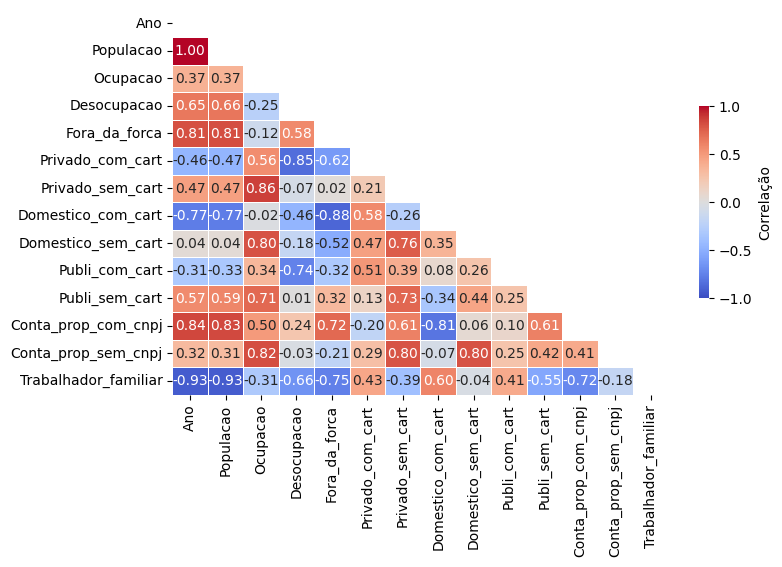

In [ ]:
# O método corr() é responsável por calcular todas as correlações existentes
# no dataframe e utilizando o heatmap() da biblioteca seaborn, é possível
# o mapa de calor baseado nessas informações
import seaborn as sns

correlation = df.corr(method='pearson')
mascara = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize = ((8, 5)))
plot = sns.heatmap(correlation,
                   mask=mascara,
                   annot = True,
                   fmt=".2f", vmax=1, center=0, vmin=-1,
                   cbar=True, cmap='coolwarm',
                   linewidths=.5,
                   cbar_kws={"shrink": .5, 'label': 'Correlação', 'orientation': 'vertical'})

plt.show()

Depois de verificar as correlações, foram escolhidos os seguintes atributos para avaliar em gráficos de dispersão:

* Privado sem carteira assinada x Ocupação
* Doméstico com carteira assinada x Ocupação
* Doméstico sem carteira assinada x Ocupação
* ADM. público sem carteira assinada x Ocupação
* ADM. público com carteira assinada x Ocupação
* Trabalhador familiar x Ocupação
* Trabalhador por conta própria com cnpj x Ocupação
* Trabalhador por conta própria sem cnpj x Ocupação

<Axes: title={'center': 'Privado_sem_cart x Ocupacao'}, xlabel='Privado_sem_cart', ylabel='Ocupacao'>

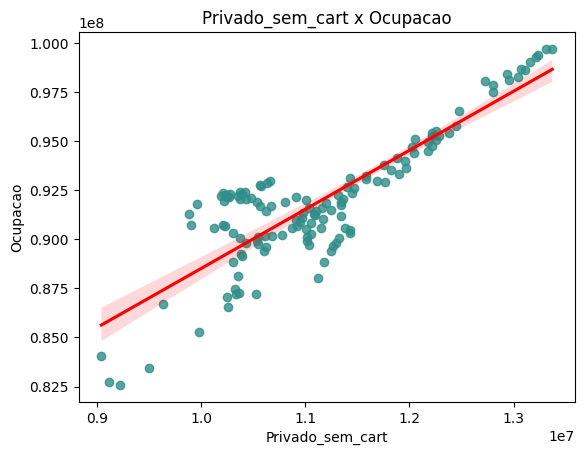

In [ ]:
# Gráfico de regressão linear sobre "trabalhador do setor privado sem carteira X Ocupação"
plt.title('Privado_sem_cart x Ocupacao')
sn.regplot(df, x='Privado_sem_cart', y='Ocupacao',color='#2F8E89', line_kws={'color': 'red'})

população ocup vs emprego privado sem carteira (Correlação: +0,86):

*Existe uma forte correlação positiva entre a população ocupada e o número de empregados no setor privado sem carteira de trabalho assinada. Isso sugere que, à medida que a população ocupada aumenta, o número de empregados informais no setor privado também tende a aumentar significativamente.


<Axes: title={'center': 'Domestico_com_cart X Ocupacao'}, xlabel='Domestico_com_cart', ylabel='Ocupacao'>

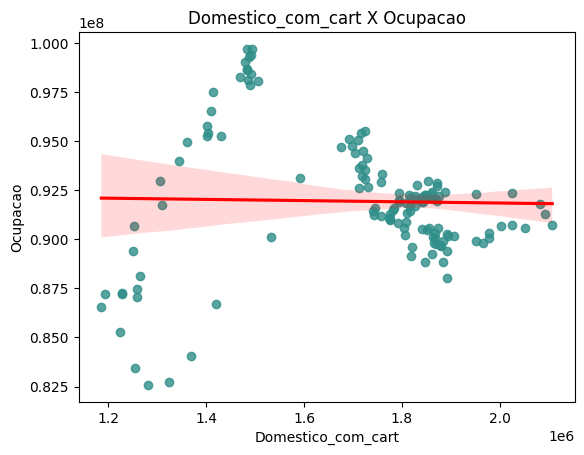

In [ ]:
# Gráfico de regressão linear sobre "trabalhador domestico com carteira x Ocupação"

plt.title('Domestico_com_cart X Ocupacao')
sn.regplot(df, x='Domestico_com_cart', y='Ocupacao',color='#2F8E89', line_kws={'color': 'red'})

população ocup vs domestico com carteira (Correlação: -0,02):

*Não há uma correlação significativa entre a população ocupada e o número de trabalhadores domésticos com carteira de trabalho assinada.

<Axes: title={'center': 'Domestico_sem_cart x Ocupacao'}, xlabel='Domestico_sem_cart', ylabel='Ocupacao'>

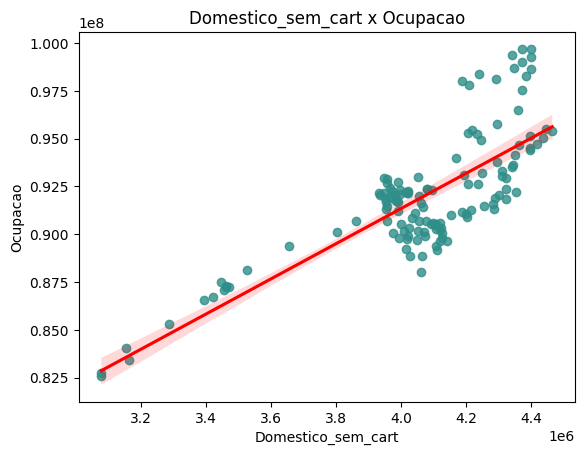

In [ ]:
# Gráfico de regressão linear sobre "trabalhador domestico sem carteira x Ocupação"
plt.title('Domestico_sem_cart x Ocupacao')
sn.regplot(df, x='Domestico_sem_cart', y='Ocupacao',color='#2F8E89', line_kws={'color': 'red'})

população ocup vs domestico sem carteira (Correlação: +0,80):

*Existe uma forte correlação positiva entre a população ocupada e o número de trabalhadores domésticos sem carteira de trabalho assinada. Isso sugere que, à medida que a população ocupada aumenta, o número de trabalhadores domésticos informais também tende a aumentar consideravelmente.


<Axes: title={'center': 'Publi_sem_cart x Ocupacao'}, xlabel='Publi_sem_cart', ylabel='Ocupacao'>

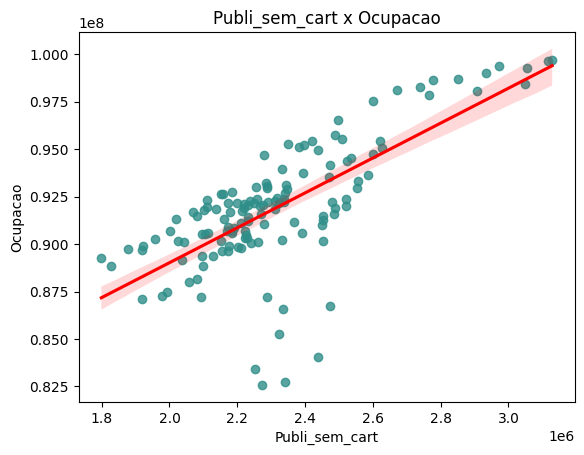

In [ ]:
# Gráfico de regressão linear sobre "trabalhador do setor público sem carteira x Ocupação"
plt.title('Publi_sem_cart x Ocupacao')
sn.regplot(df, x='Publi_sem_cart', y='Ocupacao',color='#2F8E89', line_kws={'color': 'red'})

população ocup vs emprego publico sem carteira (Correlação: +0,34):

*Há uma correlação moderada positiva entre a população ocupada e o número de empregados no setor público sem carteira de trabalho assinada. Isso indica que, à medida que a população ocupada aumenta, o número de empregados no setor público também pode aumentar.


<Axes: title={'center': 'Publi_com_cart x Ocupacao'}, xlabel='Publi_com_cart', ylabel='Ocupacao'>

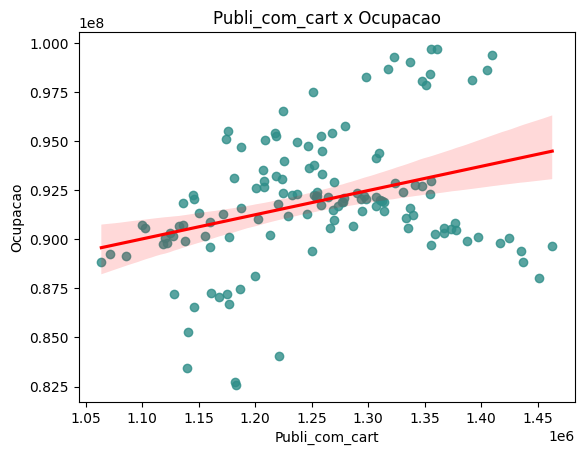

In [ ]:
# Gráfico de regressão linear sobre "trabalhador do setor público com carteira x Ocupação"
plt.title('Publi_com_cart x Ocupacao')
sn.regplot(df, x='Publi_com_cart', y='Ocupacao',color='#2F8E89', line_kws={'color': 'red'})

população ocup vs emprego publico com carteira (Correlação: +0,71):

*Existe uma correlação substancial entre a população ocupada e o número de empregados no setor público com carteira de trabalho assinada. À medida que a população ocupada cresce, o número de empregados no setor público também aumenta consideravelmente.



<Axes: title={'center': 'Trabalhador_familiar x Ocupacao'}, xlabel='Trabalhador_familiar', ylabel='Ocupacao'>

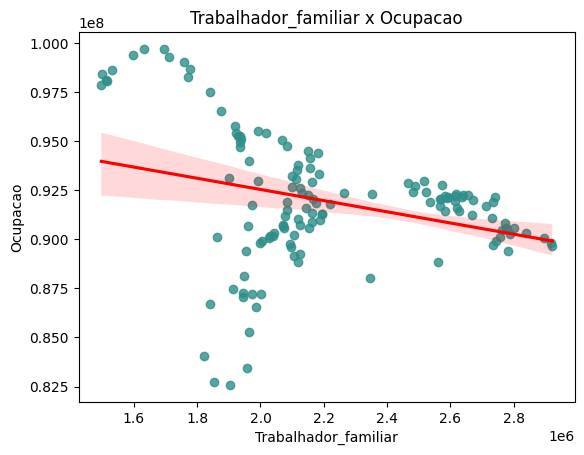

In [ ]:
# Gráfico de regressão linear sobre Trabalhador familiar x Ocupação
# Trabalhador familiar auxiliar: pessoas que trabalham auxiliando familiares sem receber remuneração
plt.title('Trabalhador_familiar x Ocupacao')
sn.regplot(df, x='Trabalhador_familiar', y='Ocupacao',color='#2F8E89', line_kws={'color': 'red'})

população ocup vs trabalhador familiar auxiliar (Correlação: -0,31):

*Existe uma correlação moderada negativa entre a população ocupada e o número de trabalhadores familiares auxiliares. Isso sugere que, à medida que a população ocupada aumenta, o número de trabalhadores familiares auxiliares tende a diminuir.


<Axes: title={'center': 'Conta_prop_com_cnpj x Ocupacao'}, xlabel='Conta_prop_com_cnpj', ylabel='Ocupacao'>

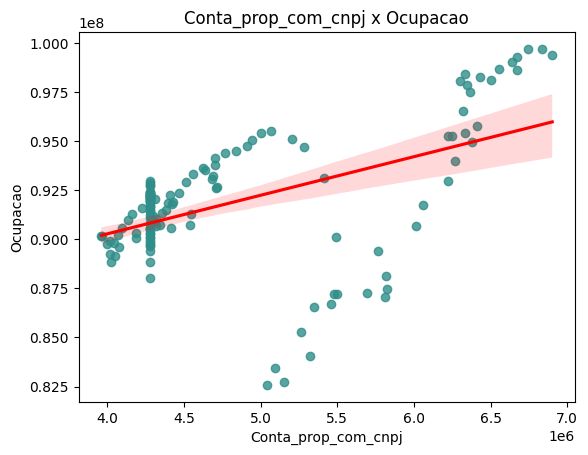

In [ ]:
# Gráfico de regressão linear sobre "trabalhador que trabalha por conta própria (com cnpj) x Ocupação"
plt.title('Conta_prop_com_cnpj x Ocupacao')
sn.regplot(df, x='Conta_prop_com_cnpj', y='Ocupacao',color='#2F8E89', line_kws={'color': 'red'})

população ocup vs conta propria com cnpj (Correlação: +0,50):

*Há uma correlação moderada positiva entre a população ocupada e o número de pessoas que possuem conta própria com registro no CNPJ. Isso indica que à medida que a população ocupada aumenta, o número de pessoas que possuem uma atividade econômica formal registrada tende a aumentar.


<Axes: title={'center': 'Conta_prop_sem_cnpj x Ocupacao'}, xlabel='Conta_prop_sem_cnpj', ylabel='Ocupacao'>

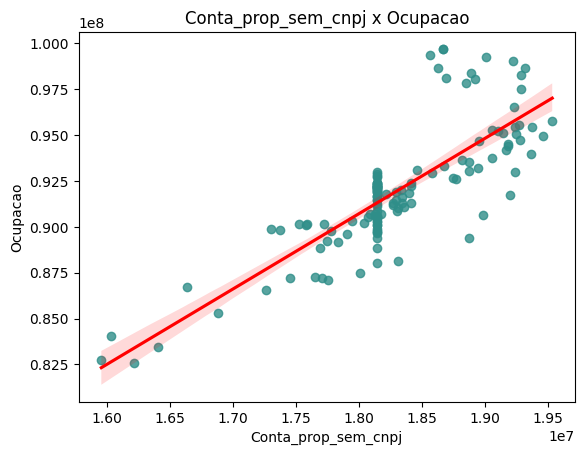

In [ ]:
# Gráfico de regressão linear sobre "trabalhador que trabalha por conta própria (sem cnpj) x Ocupação"
plt.title('Conta_prop_sem_cnpj x Ocupacao')
sn.regplot(df, x='Conta_prop_sem_cnpj', y='Ocupacao',color='#2F8E89', line_kws={'color': 'red'})

população ocup vs conta propria sem cnpj (Correlação: +0,82):

*Existe uma forte correlação positiva entre a população ocupada e o número de pessoas que possuem conta própria sem registro no CNPJ. Isso sugere que, à medida que a população ocupada aumenta, o número de trabalhadores por conta própria informais também aumenta significativamente.

## Conclusão

O mercado de trabalho é uma área complexa e em constante evolução, onde diferentes formas de emprego coexistem e interagem. A distinção entre funcionários com carteira assinada, trabalhadores informais e outras modalidades de emprego cria uma paisagem diversificada e muitas vezes desafiadoras. Aqui estão algumas conclusões a considerar em relação a essas diferentes categorias de trabalhadores:


Os funcionários com carteira assinada geralmente desfrutam de benefícios e proteções legais mais robustos, como FGTS, aposentadoria,décimo terceiro salário, férias remuneradas e benefícios previdenciários.
A relação empregador-empregado é formalizada por meio de contratos de trabalho, que delineiam direitos, deveres e responsabilidades de ambas as partes.
No entanto, essa forma de emprego também pode ter suas limitações, como menor flexibilidade em termos de horário e maior burocracia.
Trabalhadores informais:


Os trabalhadores informais muitas vezes não possuem contratos formais e podem estar envolvidos em atividades não regulamentadas, como trabalho temporário, subemprego ou autônomo.
Embora a informalidade possa proporcionar uma maior flexibilidade e independência, os trabalhadores informais enfrentam desafios, como a falta de proteções sociais e direitos trabalhistas.
A informalidade pode dificultar o acesso a crédito, planejamento financeiro e benefícios de longo prazo, como aposentadoria.


Além das categorias tradicionais, o mercado de trabalho tem visto o crescimento de outras modalidades, como trabalhadores autônomos, contratos  e trabalho
temporário.

Essas formas de emprego oferecem flexibilidade e oportunidades de diversificação de habilidades, mas também podem carecer de estabilidade financeira e benefícios associados ao emprego formal.
 O mercado de trabalho brasileiro historicamente apresenta altos níveis de informalidade, onde muitos trabalhadores atuavam sem registro em carteira ou em condições menos protegidas legalmente. Esforços têm sido feitos para reduzir essa informalidade, como a implementação de políticas para incentivar a formalização e melhorar os direitos trabalhistas

#**MongoDB**

Guardando os dados da base de dados em arquivos no MongoDb

In [ ]:
# Coloque as chaves GCP e MongoDB
!pip install gcsfs
!python -m pip install pymongo

In [ ]:
# Abertura de bibliotecas de manipulação e análise
import pandas as pd
import numpy as np

# Abertura de bibliotecas de conectores
import os
from google.cloud import storage
from pymongo import MongoClient

##Google Cloud
Documentação: https://cloud.google.com/docs/authentication?hl=pt-br

In [ ]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/symphone-project-2b6e69a15a32.json' # chave de acesso ao projeto na gcp
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('mercado-de-trabalho-projeto')
bucket.blob('ipea.xls')
path = 'gs://mercado-de-trabalho-projeto/Base de Dados/IPEA/Bruto/ipea.xls'

In [ ]:
# Abertura da base de dados e cópia de segurança (bucket)
path = 'gs://mercado-de-trabalho-projeto/Base de Dados/IPEA/Bruto/ipea.xls'
df = pd.read_excel(path, sheet_name='TrimestreMovel')
dfback = df.copy()

## **MongoDB**

In [ ]:
# Conector MongoDB
# Colar seu uri e sua path da chave mongo na variavel tlsCertificateKeyFile
uri = "mongodb+srv://symphone.q44pclg.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"

# Conexão
# Após fazer o download do certificate do mongo, faça o upload dessa chave no google colab, copie o caminho e insira abaixo
client = MongoClient(uri, tls=True, tlsCertificateKeyFile='/content/X509-cert-4703031099688872260.pem') # path da chave certificare do mongo

In [ ]:
# Escolhendo a base de dados e coleção
db = client['pandasmongo']
collection = db['brutos_ipea']

In [ ]:
# Contagem dos documentos
doc_count = collection.count_documents({})
print(doc_count)

0


In [ ]:
# Abertura da base de dados e cópia de segurança (bucket)
# Arquivo xls
path = 'gs://mercado-de-trabalho-projeto/Base de Dados/IPEA/Bruto/ipea.xls'
df = pd.read_excel(path, sheet_name='TrimestreMovel')
dfback = df.copy()

In [ ]:
# Conversão para colocar no MongoDB
# esse código saí de tabela e transforma em dicionario no Mongodb
df_dict = df.to_dict("records")
collection.insert_many(df_dict)

In [ ]:
# Checagem de valores no MongoDB
collection.count_documents({})

270

In [ ]:
# Checagem da coleção do MongoDB
for x in collection.find():
  print(x)

{'_id': ObjectId('64d3ec7479ed3d68eb3259ba'), 'anomesfinaltrimmovel': 201203, 'taxapartic': 62.29999923706055, 'nivelocup': 57.29999923706055, 'niveldesocup': 5.0, 'taxadesocup': 8.0, 'perccontribprev': 62.0, 'taxacombdesosub': 15.3, 'taxacombdesopot': 14.0, 'taxacompsubutlz': 20.9, 'taxasubocuphoras': 8.0, 'percdesalento': 2.0, 'populacao': 197074, 'pop14mais': 153601, 'popnaforca': 95664, 'popocup': 88011, 'popdesocup': 7653, 'popforadaforca': 57937, 'forcaampliada': 102350, 'forcapotencial': 6685, 'desalentado': 1939, 'contribuinteprev': 54555, 'subocuphoras': 7013.0, 'empregado': 62104, 'empregpriv': 45383, 'empregprivcomcart': 34262, 'empregprivsemcart': 11122, 'domestico': 5954, 'domesticocomcart': 1892, 'domesticosemcart': 4062, 'empregpubl': 10767, 'empregpublcomcart': 1451, 'empregpublsemcart': 2059, 'estatutmilitar': 7257, 'empregador': 3388, 'empregadorcomcnpj': nan, 'empregadorsemcnpj': nan, 'contapropria': 20174, 'contapropriacomcnpj': nan, 'contapropriasemcnpj': nan, 'tra

##Tratamento

In [ ]:
# gsutil da base de dados tratada diretamente da bucket

path = 'gs://mercado-de-trabalho-projeto/Base de Dados/IPEA/Tratado/ipea_tratado.csv'
df = pd.read_csv(path,
                 encoding='ISO-8859-1',
                 )

##Carregamento

In [ ]:
# Conector MongoDB

uri = "mongodb+srv://symphone.q44pclg.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"

# Conexão
# apos fazer o download do certificate do mongo, faça o upload dessa chave no google colab, copie o caminho e insira abaixo
client = MongoClient(uri, tls=True, tlsCertificateKeyFile='/content/X509-cert-4703031099688872260.pem') # path da chave certificare do mongo

In [ ]:
# Carregamento da base de dados tratada no MongoDB
# criando a pasta dos dados tratados no mongo
db2 = client['pandasmongo']
collection2 = db2['tratados_ipea']
collection2.count_documents({})

0

In [ ]:
# Conversão de dados para MongoDB
# transformando de tabela para dicionario mongo
df_dict = df.to_dict("records")
collection2.insert_many(df_dict)

In [ ]:
# Contagem de dados: verificação
collection2.count_documents({})

135

In [ ]:
# Checagem da coleção
for x in collection2.find():
  print(x)

{'_id': ObjectId('64d3efcb79ed3d68eb325ac9'), 'Ano': 2012, 'Populacao': 197074000, 'Ocupacao': 88011000, 'Desocupacao': 7653000, 'Fora_da_forca': 57937000, 'Privado_com_cart': 34262000, 'Privado_sem_cart': 11122000, 'Domestico_com_cart': 1892000, 'Domestico_sem_cart': 4062000, 'Publi_com_cart': 1451000, 'Publi_sem_cart': 2059000, 'Conta_prop_com_cnpj': 4278000.0, 'Conta_prop_sem_cnpj': 18142000.0, 'Trabalhador_familiar': 2346000}
{'_id': ObjectId('64d3efcb79ed3d68eb325aca'), 'Ano': 2012, 'Populacao': 197217000, 'Ocupacao': 88846000, 'Desocupacao': 7534000, 'Fora_da_forca': 57411000, 'Privado_com_cart': 34574000, 'Privado_sem_cart': 11180000, 'Domestico_com_cart': 1884000, 'Domestico_sem_cart': 4064000, 'Publi_com_cart': 1437000, 'Publi_sem_cart': 2098000, 'Conta_prop_com_cnpj': 4278000.0, 'Conta_prop_sem_cnpj': 18142000.0, 'Trabalhador_familiar': 2562000}
{'_id': ObjectId('64d3efcb79ed3d68eb325acb'), 'Ano': 2012, 'Populacao': 197359000, 'Ocupacao': 89379000, 'Desocupacao': 7444000, 'Fo